# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [3]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Download from Atlas and Load Data

In [5]:
ens_codes = [
    "3a1g_B"
]
data_dir = 'C:/Users/nikol/Documents/test_dir/atlas'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='atlas')

File already exists. Skipping download.
Extracted file C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.zip.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R1_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R2_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R3_fit.top.pdb.
File already exists. Skipping download.
Extracted file C:\Users\nikol\Documents\test_dir\atlas\3a1g_A.zip.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_A.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_A_prod_R1_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_A.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_A_prod_R2_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_A.pdb to C:\Users

In [6]:
analysis.generate_trajectories()

Trajectory already exists for ensemble 3a1g_B_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R3_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_A_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_A_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_A_prod_R3_fit. Loading trajectory.


In [7]:
analysis.random_sample_trajectories(sample_size=300)

## Featurization

In [8]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: 3a1g_B_prod_R1_fit.
Transformed ensemble shape: (300, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R2_fit.
Transformed ensemble shape: (300, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R3_fit.
Transformed ensemble shape: (300, 78)
Performing feature extraction for Ensemble: 3a1g_A_prod_R1_fit.
Transformed ensemble shape: (300, 158)
Performing feature extraction for Ensemble: 3a1g_A_prod_R2_fit.
Transformed ensemble shape: (300, 158)
Performing feature extraction for Ensemble: 3a1g_A_prod_R3_fit.
Transformed ensemble shape: (300, 158)
Feature names: ['GLY2-PHI', 'SER3-PHI', 'MET4-PHI', 'GLU5-PHI', 'ARG6-PHI', 'ILE7-PHI', 'LYS8-PHI', 'GLU9-PHI', 'LEU10-PHI', 'ARG11-PHI', 'ASN12-PHI', 'LEU13-PHI', 'MET14-PHI', 'SER15-PHI', 'GLN16-PHI', 'SER17-PHI', 'ARG18-PHI', 'THR19-PHI', 'ARG20-PHI', 'GLU21-PHI', 'ILE22-PHI', 'LEU23-PHI', 'THR24-PHI', 'LYS25-PHI', 'THR26-PHI', 'THR27-PHI', 'VAL28-PHI', 'ASP29-PHI', 'HIS30-PHI', 

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 78 and the array at index 3 has size 158

## Dimensionality Reduction

In [10]:
analysis.fit_dimensionality_reduction(method='tsne', perplexity_vals = [10, 50, 90], circular=True, range_n_clusters=range(2,10,1))

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 3


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## Analysis

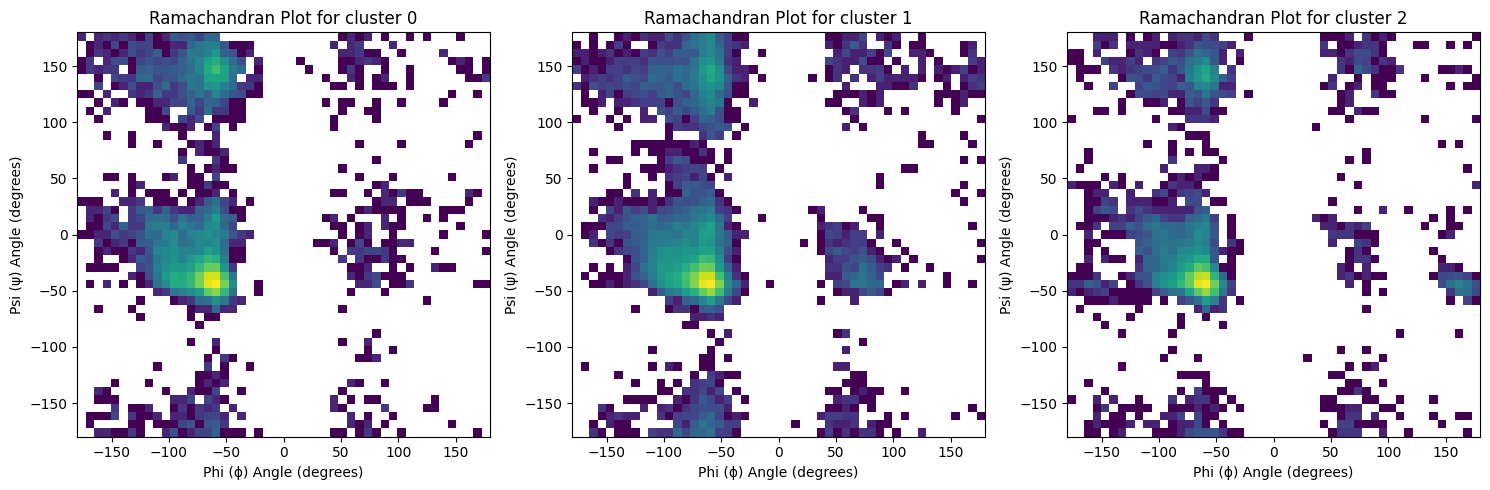

In [11]:
analysis.tsne_ramachandran_plot_density(save=True)

Calculating rg...


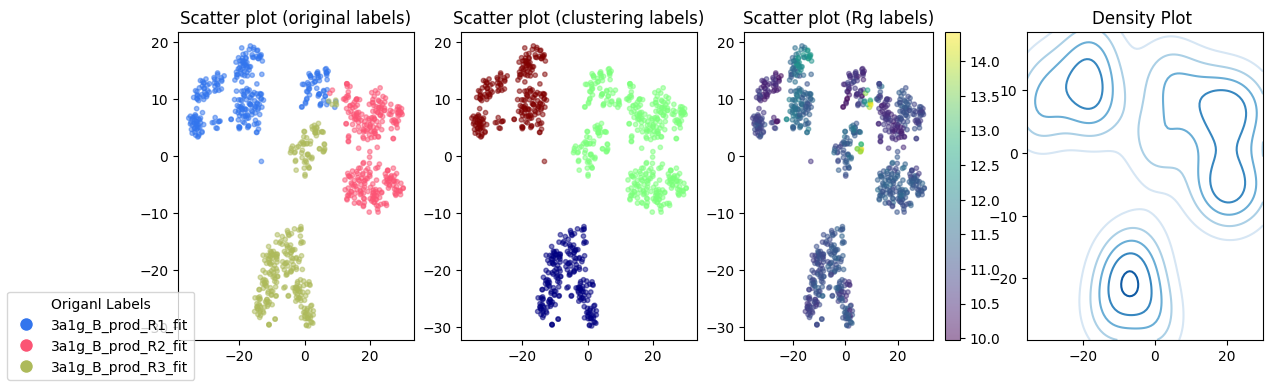

In [9]:
analysis.tsne_scatter_plot(save=True)

Calculating rg...


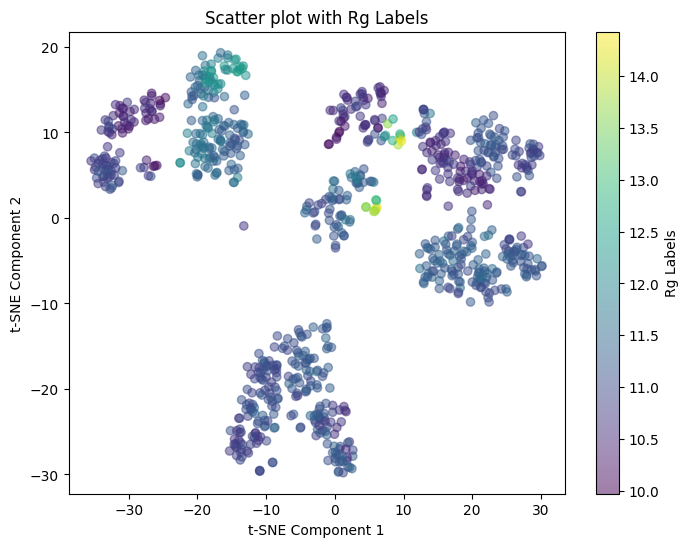

In [10]:
analysis.tsne_scatter_plot_rg(save=True)

In [11]:
analysis.generate_tsne_report()

Calculating rg...
Calculating rg...
Plots saved to C:\Users\nikol\Documents\test_dir\atlas\plots\tsne.pdf


In [12]:
analysis.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\atlas\plots\custom_report.pdf
